In [54]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

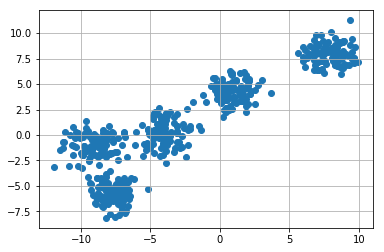

In [55]:
x,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)
plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [56]:
# We can observe that -10<x<10 and -10.0 < y < 10
# Initialize the centers
# This code generates centers x and y coordinates in range of -10 to 10

center = [10*(2*np.random.random((x.shape[1],))-1)]
print(center)


[array([-8.65983082,  5.28120714])]


In [121]:
k = 5

color  = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster

In [122]:
clusters


{0: {'center': array([-8.33814979,  4.95303566]),
  'color': 'green',
  'points': []},
 1: {'center': array([ 9.67154682, -3.87486445]),
  'color': 'red',
  'points': []},
 2: {'center': array([-5.72893055,  7.35916148]),
  'color': 'blue',
  'points': []},
 3: {'center': array([-5.96124873, -8.9229184 ]),
  'color': 'yellow',
  'points': []},
 4: {'center': array([-6.81695466, -8.92251571]),
  'color': 'orange',
  'points': []}}

In [106]:
# Distance calculation(Euclidiant distance)
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [107]:
v1 = np.array([2,3])
v2 = np.array([3,5])
distance(v1,v2)

2.23606797749979

In [123]:
def assignment(clusters): #E-Step
    for ix in range(x.shape[0]):
        dist = []
        curr_x = x[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

In [124]:
assignment(clusters)

In [125]:
for i in range(k):
    print(len(clusters[i]['points']))

177
84
121
11
107


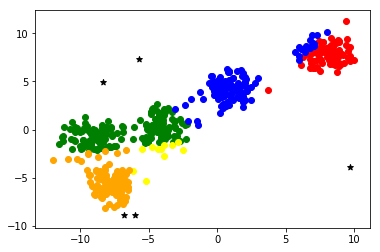

In [126]:

plot_cluster(clusters)

In [130]:
assignment(clusters)

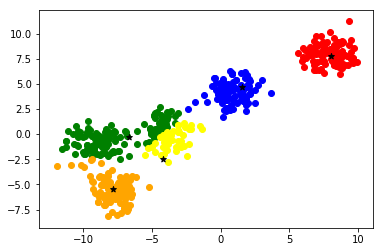

In [131]:
plotClusters(clusters)

In [132]:
updateClusters(clusters)